In [11]:
from numpy import mean, std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [12]:
df = read_csv('horse-colic.csv', header=None, na_values='?')

In [13]:
data = df.values

In [14]:
ix = [i for i in range(data.shape[1]) if i != 23]

In [15]:
X, y = data[:, ix], data[:, 23]

In [16]:
results = list()

In [17]:
strategies = ['mean', 'median', 'most_frequent', 'constant']

In [18]:
for s in strategies:
    pipeline = Pipeline([('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

>mean 0.868 (0.050)
>median 0.872 (0.062)
>most_frequent 0.869 (0.056)
>constant 0.880 (0.056)


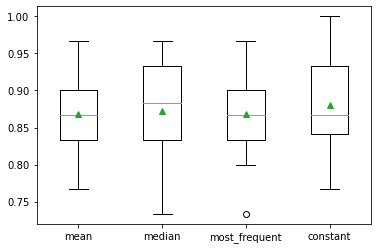

In [20]:
pyplot.boxplot(results, labels=strategies, showmeans=True);